<a href="https://colab.research.google.com/github/Sonali-Kotni57/Fraud-Detection-Using-Ensembling-Algorithms-Machine-Learning-/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fraud Detection**



step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

**Importing the Packages**

In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

**Loading The DataSet**

In [ ]:
FD = pd.read_csv("/content/sample_data/Fraud.csv")

**Shape of the Dataset**

In [ ]:
print(f"Data shape: {FD.shape}")


Data shape: (1048575, 11)


**Information of the dataset**

In [ ]:
FD.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
FD.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [ ]:
FD.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


**Data Cleaning**

In [ ]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
FD.dropna(thresh=2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [ ]:
nan_value = float("NaN")

FD.replace("", nan_value, inplace=True)

FD.dropna(subset = ["isFraud"], inplace=True)

print(FD)

         step      type     amount  ... newbalanceDest  isFraud  isFlaggedFraud
0           1   PAYMENT    9839.64  ...           0.00        0               0
1           1   PAYMENT    1864.28  ...           0.00        0               0
2           1  TRANSFER     181.00  ...           0.00        1               0
3           1  CASH_OUT     181.00  ...           0.00        1               0
4           1   PAYMENT   11668.14  ...           0.00        0               0
...       ...       ...        ...  ...            ...      ...             ...
1048570    95  CASH_OUT  132557.35  ...      616886.72        0               0
1048571    95   PAYMENT    9917.36  ...           0.00        0               0
1048572    95   PAYMENT   14140.05  ...           0.00        0               0
1048573    95   PAYMENT   10020.05  ...           0.00        0               0
1048574    95   PAYMENT   11450.03  ...           0.00        0               0

[1048575 rows x 11 columns]


In [ ]:
missing_data(FD)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0
Types,int64,object,float64,object,float64,float64,object,float64,float64,int64,int64


In [ ]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [ ]:
unique_values(FD)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
Total,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575
Uniques,95,5,1009606,1048317,391033,440792,449635,590110,437054,2,1


**Distribution of Data**

Here, count plot and box plot  is used for visualizing the data

In [ ]:
def plot_count(df, feature, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(3*size,2*size))
    total = float(len(df))
    sns.countplot(df[feature],order = df[feature].value_counts().index, palette='Set3')
    plt.title(title)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.4f}%'.format(100*height/total),
                ha="center") 
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



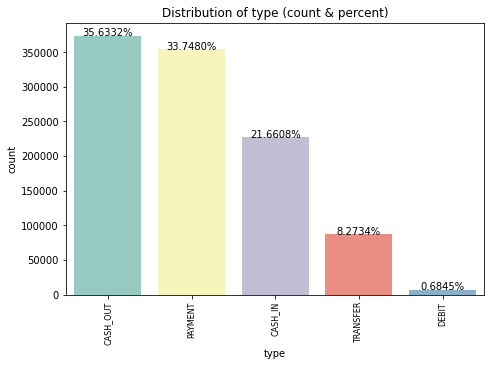

In [ ]:
plot_count(FD, 'type', 'Distribution of type (count & percent)', size=2.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



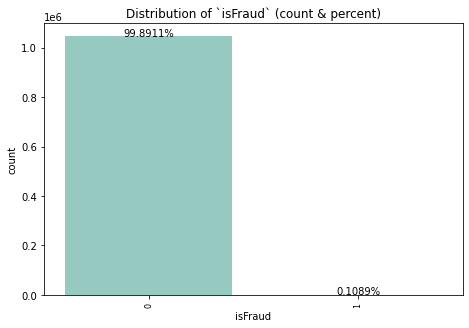

In [ ]:
plot_count(FD, 'isFraud', 'Distribution of `isFraud` (count & percent)', size=2.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



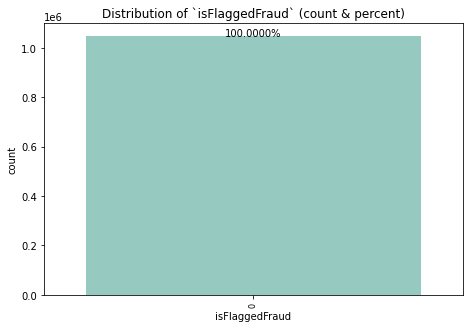

In [ ]:
plot_count(FD, 'isFlaggedFraud', 'Distribution of `isFlaggedFraud` (count & percent)', size=2.5)

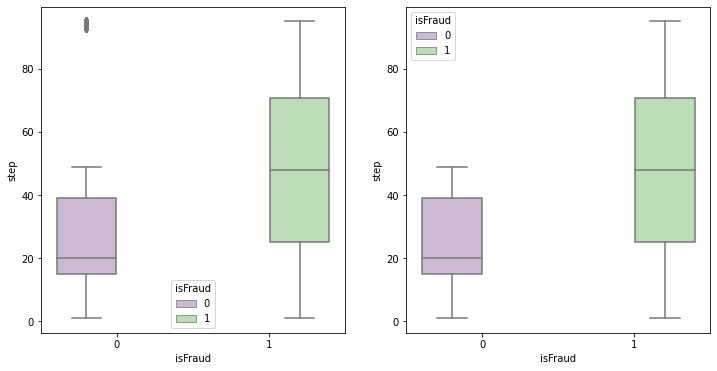

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="isFraud", y="step", hue="isFraud",data=FD, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="step", hue="isFraud",data=FD, palette="PRGn",showfliers=False)
plt.show()

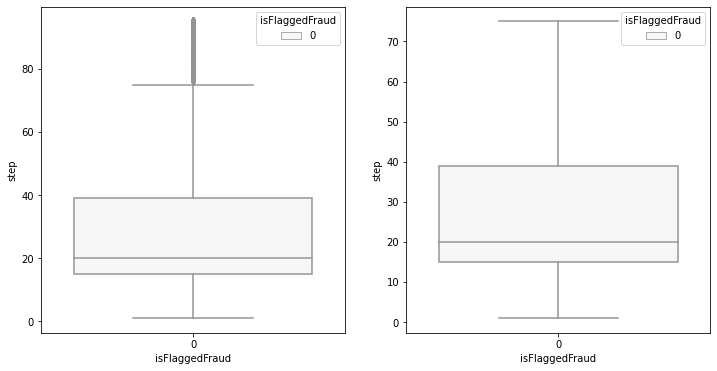

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="isFlaggedFraud", y="step", hue="isFlaggedFraud",data=FD, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFlaggedFraud", y="step", hue="isFlaggedFraud",data=FD, palette="PRGn",showfliers=False)
plt.show()

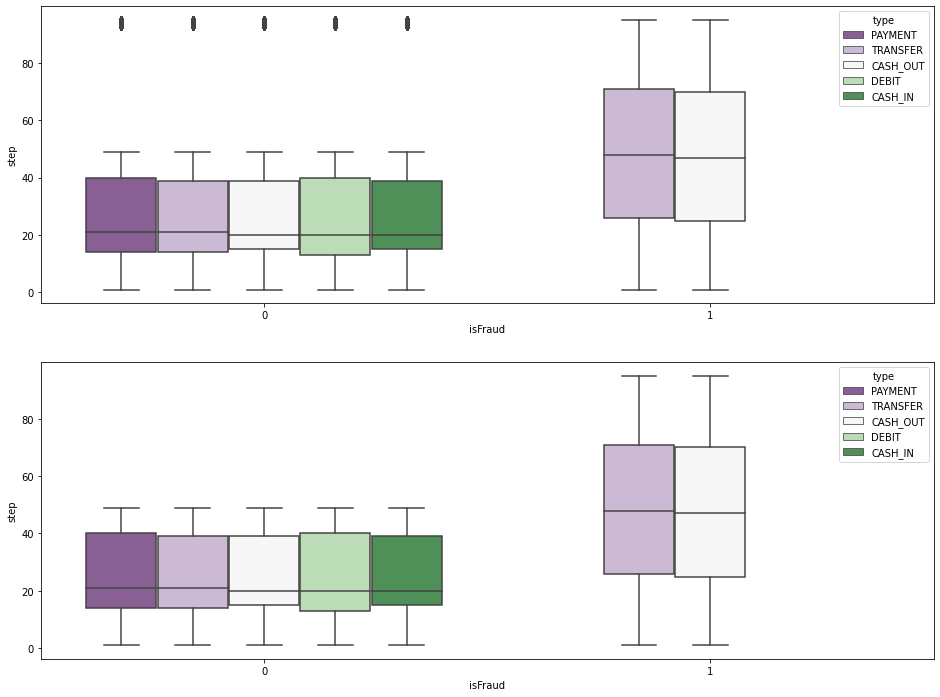

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFraud", y="step", hue="type",data=FD, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="step", hue="type",data=FD, palette="PRGn",showfliers=False)
plt.show()

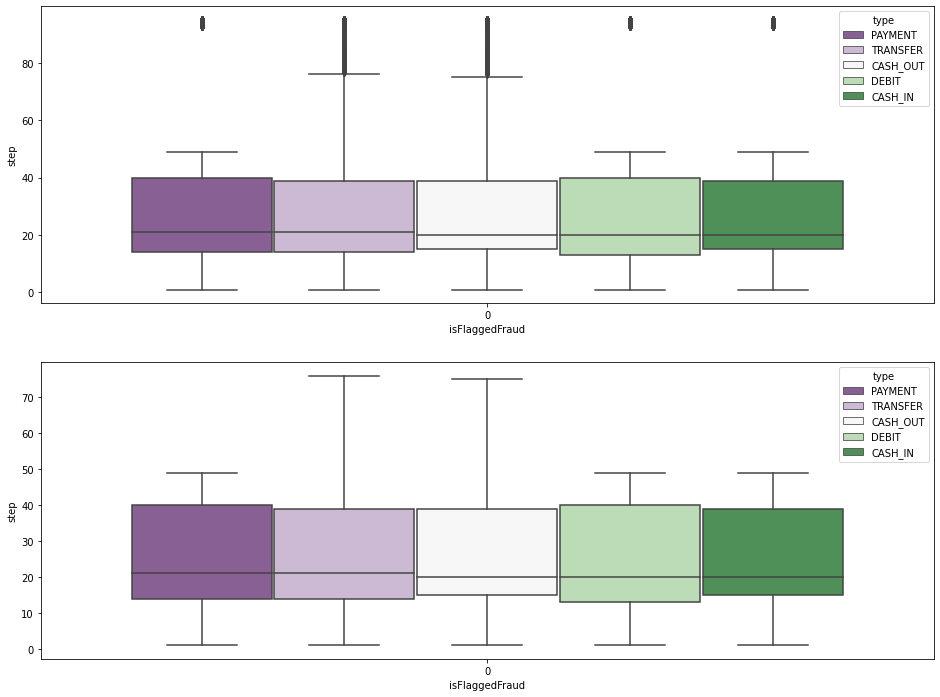

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFlaggedFraud", y="step", hue="type",data=FD, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFlaggedFraud", y="step", hue="type",data=FD, palette="PRGn",showfliers=False)
plt.show()

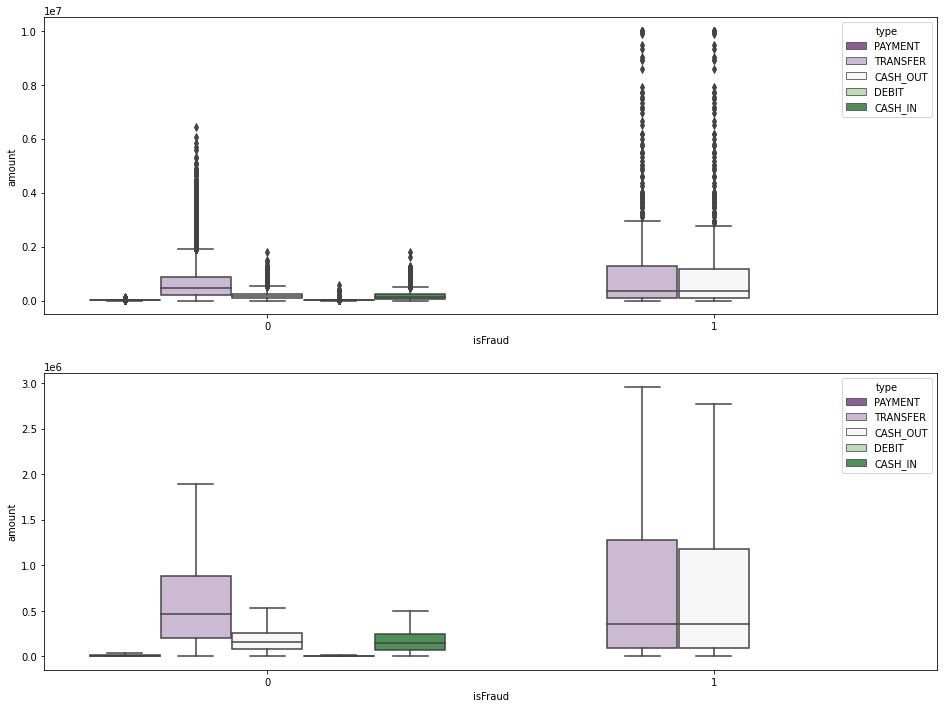

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFraud", y="amount", hue="type",data=FD, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="amount", hue="type",data=FD, palette="PRGn",showfliers=False)
plt.show()

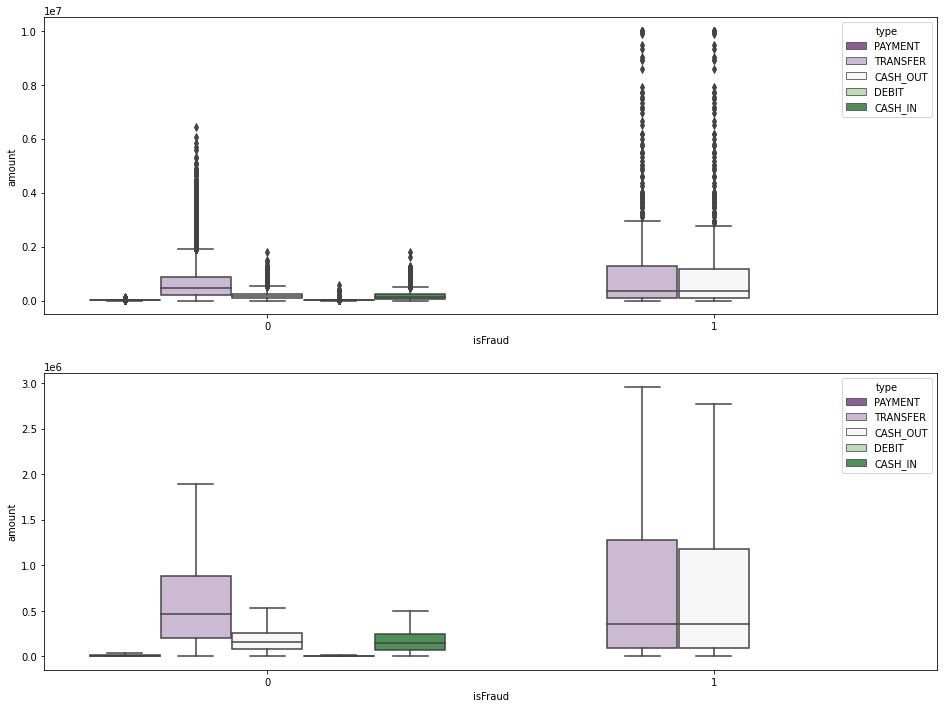

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFraud", y="amount", hue="type",data=FD, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="amount", hue="type",data=FD, palette="PRGn",showfliers=False)
plt.show()

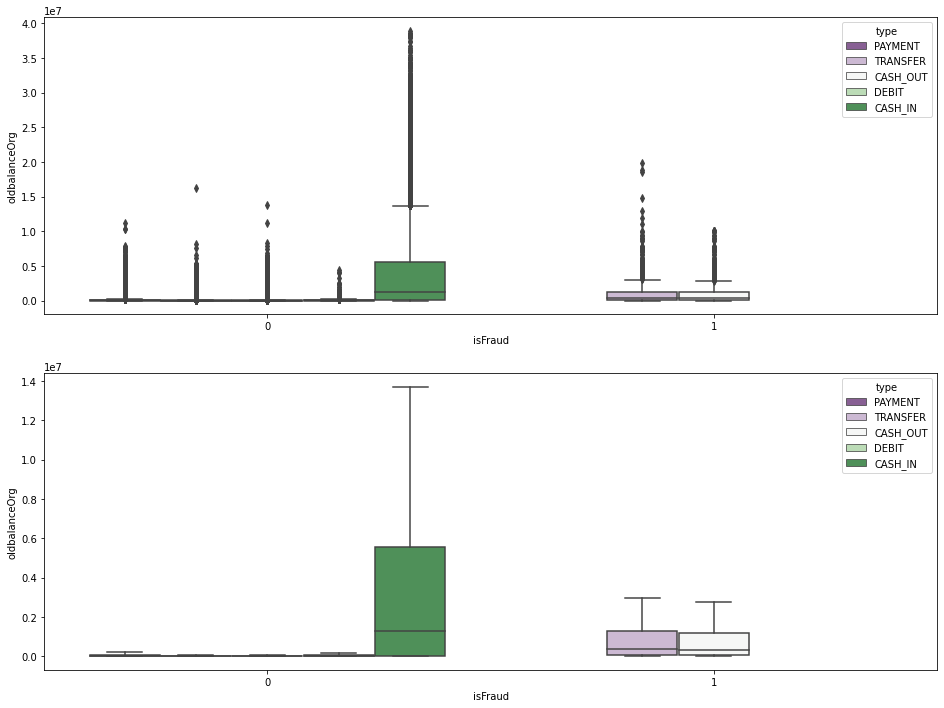

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFraud", y="oldbalanceOrg", hue="type",data=FD, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="oldbalanceOrg", hue="type",data=FD, palette="PRGn",showfliers=False)
plt.show()

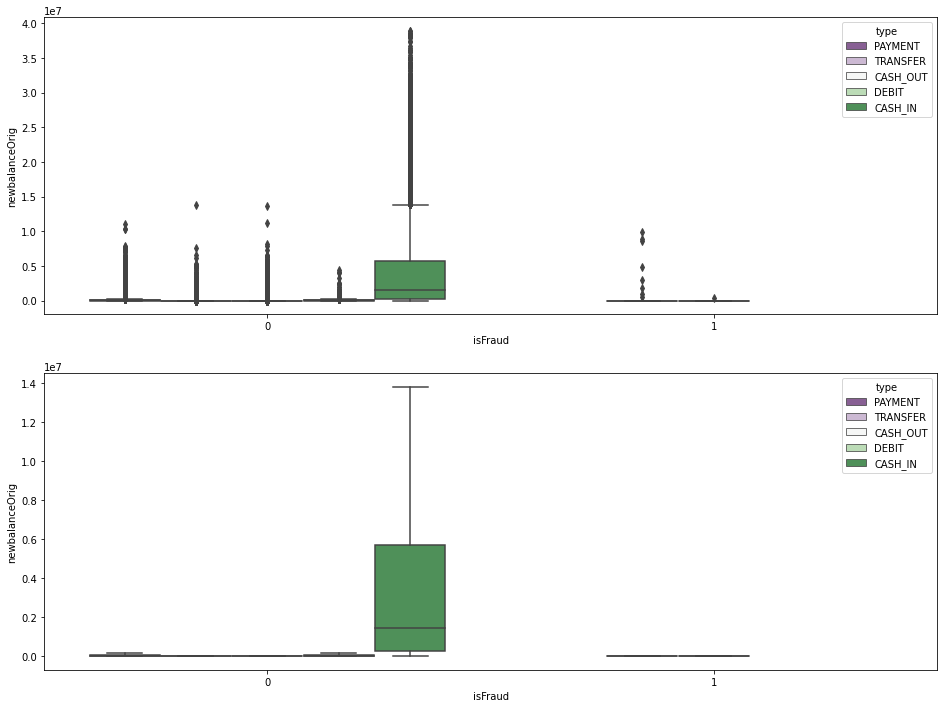

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFraud", y="newbalanceOrig", hue="type",data=FD, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="newbalanceOrig", hue="type",data=FD, palette="PRGn",showfliers=False)
plt.show()

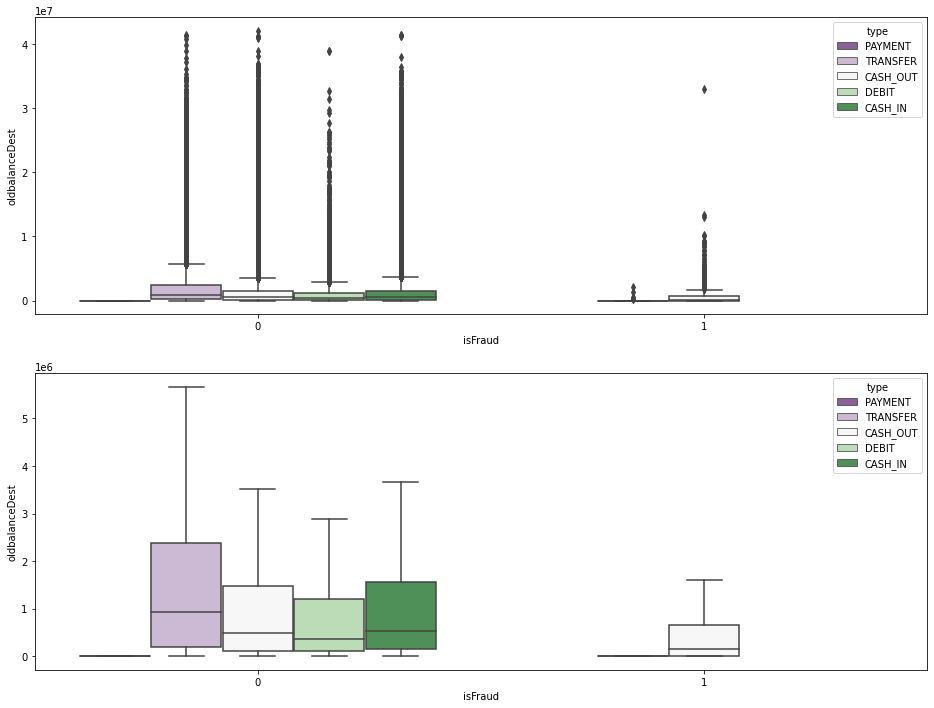

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFraud", y="oldbalanceDest", hue="type",data=FD, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="oldbalanceDest", hue="type",data=FD, palette="PRGn",showfliers=False)
plt.show()

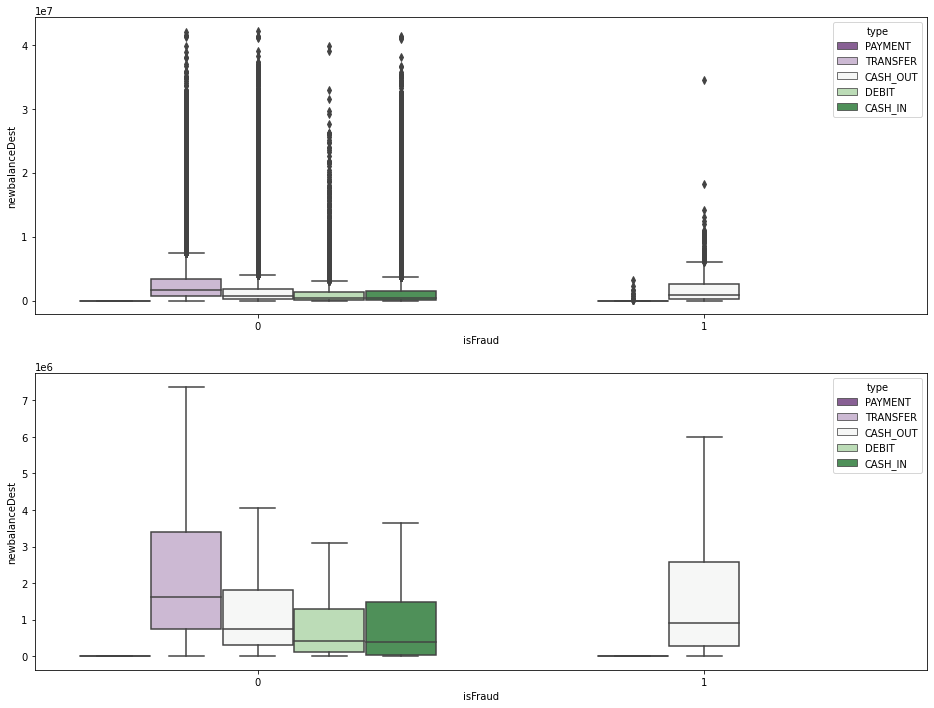

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFraud", y="newbalanceDest", hue="type",data=FD, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="newbalanceDest", hue="type",data=FD, palette="PRGn",showfliers=False)
plt.show()

**Model Implementation**

**Splitting of Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


**Installing CatBoost Package**

In [ ]:
!pip3 install catboost

**CatBoost Classifier**

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
X = FD.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = FD.isFraud

**train-validation split**

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

In [ ]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [ ]:
clf.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9115396	best: 0.9115396 (0)	total: 2.36s	remaining: 19m 38s
20:	test: 0.9808192	best: 0.9808192 (20)	total: 29.7s	remaining: 11m 16s
40:	test: 0.9944727	best: 0.9944727 (40)	total: 1m 22s	remaining: 15m 27s
60:	test: 0.9970566	best: 0.9970566 (60)	total: 2m 12s	remaining: 15m 53s
80:	test: 0.9976215	best: 0.9976215 (80)	total: 3m 3s	remaining: 15m 50s
100:	test: 0.9978905	best: 0.9978929 (98)	total: 3m 49s	remaining: 15m 8s
120:	test: 0.9980512	best: 0.9980576 (119)	total: 4m 40s	remaining: 14m 37s
140:	test: 0.9982876	best: 0.9982876 (140)	total: 5m 26s	remaining: 13m 51s
160:	test: 0.9983703	best: 0.9983716 (157)	total: 6m 9s	remaining: 12m 57s
180:	test: 0.9984181	best: 0.9984181 (180)	total: 6m 52s	remaining: 12m 7s
200:	test: 0.9984325	best: 0.9984337 (196)	total: 7m 30s	remaining: 11m 10s
220:	test: 0.9984848	best: 0.9984848 (220)	total: 8m 10s	remaining: 10m 18s
240:	test: 0.9985035	best: 0.9985053 (238)	total: 8m 49s	remaining: 9m 28s
260:	test: 0.9985436	best: 0.998

**Prediction for validation set**

In [ ]:
preds = clf.predict(X_validation)

**Confusion matrix**

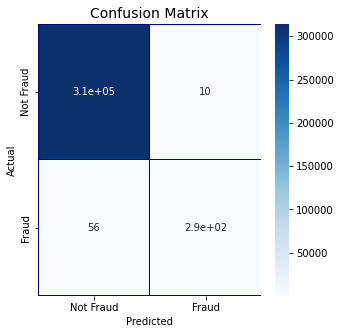

In [ ]:
cm = pd.crosstab(y_validation.values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

**Validation ROC-AUC**

In [ ]:
print(f"ROC-AUC score: {roc_auc_score(y_validation.values, preds)}")


ROC-AUC score: 0.9197548614234788


**CatBoost Regressor**

In [ ]:
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0313062	test: 0.0318115	best: 0.0318115 (0)	total: 241ms	remaining: 11.8s
1:	learn: 0.0299933	test: 0.0305544	best: 0.0305544 (1)	total: 407ms	remaining: 9.77s
2:	learn: 0.0288822	test: 0.0294878	best: 0.0294878 (2)	total: 530ms	remaining: 8.3s
3:	learn: 0.0279499	test: 0.0285528	best: 0.0285528 (3)	total: 648ms	remaining: 7.45s
4:	learn: 0.0271667	test: 0.0277966	best: 0.0277966 (4)	total: 760ms	remaining: 6.84s
5:	learn: 0.0264956	test: 0.0271442	best: 0.0271442 (5)	total: 934ms	remaining: 6.85s
6:	learn: 0.0259395	test: 0.0266029	best: 0.0266029 (6)	total: 1.05s	remaining: 6.44s
7:	learn: 0.0254934	test: 0.0261532	best: 0.0261532 (7)	total: 1.16s	remaining: 6.08s
8:	learn: 0.0251108	test: 0.0257821	best: 0.0257821 (8)	total: 1.27s	remaining: 5.79s
9:	learn: 0.0248041	test: 0.0254722	best: 0.0254722 (9)	total: 1.38s	remaining: 5.52s
10:	learn: 0.0245513	test: 0.0252186	best: 0.0252186 (10)	total: 1.49s	remaining: 5.3s
11:	learn: 0.0243418	test: 0.0250074	best: 0.0250074 (

**Prediction for validation set**

In [ ]:
preds = model.predict(X_validation)

**Validation ROC-AUC**

In [ ]:
print(f"ROC-AUC score: {roc_auc_score(y_validation.values, preds)}")


ROC-AUC score: 0.9880343741423817


**Here , I used two algorithms to find the performance in fraud detection.  When using CatBoost Alogrithm , the model is 91% accurate and when it comes to using CatBoost Regressor Algorithm , the model is 98% accurate. 
I used these two algorithms as CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features**